In [2]:
!apt-get install -y tesseract-ocr
!apt-get install -y poppler-utils
!pip install pdf2image opencv-python pytesseract

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install opencv-python-headless
!pip install git+https://github.com/ultralytics/yolov5.git

import torch
import shutil
import os
from IPython.display import Image, display
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

train_images_path = "/content/drive/MyDrive/TechConsulting/Project1/path_to_dataset/images/train"
val_images_path = "/content/drive/MyDrive/TechConsulting/Project1/path_to_dataset/images/val"
train_labels_path = "/content/drive/MyDrive/TechConsulting/Project1/path_to_dataset/labels/train"
val_labels_path = "/content/drive/MyDrive/TechConsulting/Project1/path_to_dataset/labels/val"

os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

if not os.listdir(val_images_path):
    num_val_samples = 10
    train_images = os.listdir(train_images_path)[:num_val_samples]

    for image in train_images:
        shutil.copy(os.path.join(train_images_path, image), val_images_path)
        label_file = image.replace('.jpg', '.txt')  # Adjust this if your label format is different
        shutil.copy(os.path.join(train_labels_path, label_file), val_labels_path)

data_yaml_path = "/content/drive/MyDrive/TechConsulting/Project1/path_to_dataset/data.yaml"
assert os.path.exists(data_yaml_path), "data.yaml file not found!"

!python train.py --img 640 --batch 16 --epochs 100 --data $data_yaml_path --weights yolov5s.pt --name custom_yolo_model

best_weights_path = "runs/train/custom_yolo_model/weights/best.pt"
if os.path.exists(best_weights_path):
    print(f"Training completed! Best weights saved at: {best_weights_path}")
else:
    raise FileNotFoundError(f"Training failed. 'best.pt' not found at: {best_weights_path}")

model = torch.hub.load('ultralytics/yolov5', 'custom', path=best_weights_path)
test_image_path = "/content/drive/MyDrive/TechConsulting/Project1/path_to_dataset/images/val/Image_Test.jpg"  # Replace with your test image path

image_cv2 = cv2.imread(test_image_path)

results = model(image_cv2)

results.save()
cv2_imshow(image_cv2)
cv2.imwrite('contentPredicted_Image.jpg', image_cv2)


Output hidden; open in https://colab.research.google.com to view.

Looking in indexes: https://download.pytorch.org/whl/cu118
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 959.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-9-23 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to runs/detect/exp2
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to runs/detect/exp3
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to ru

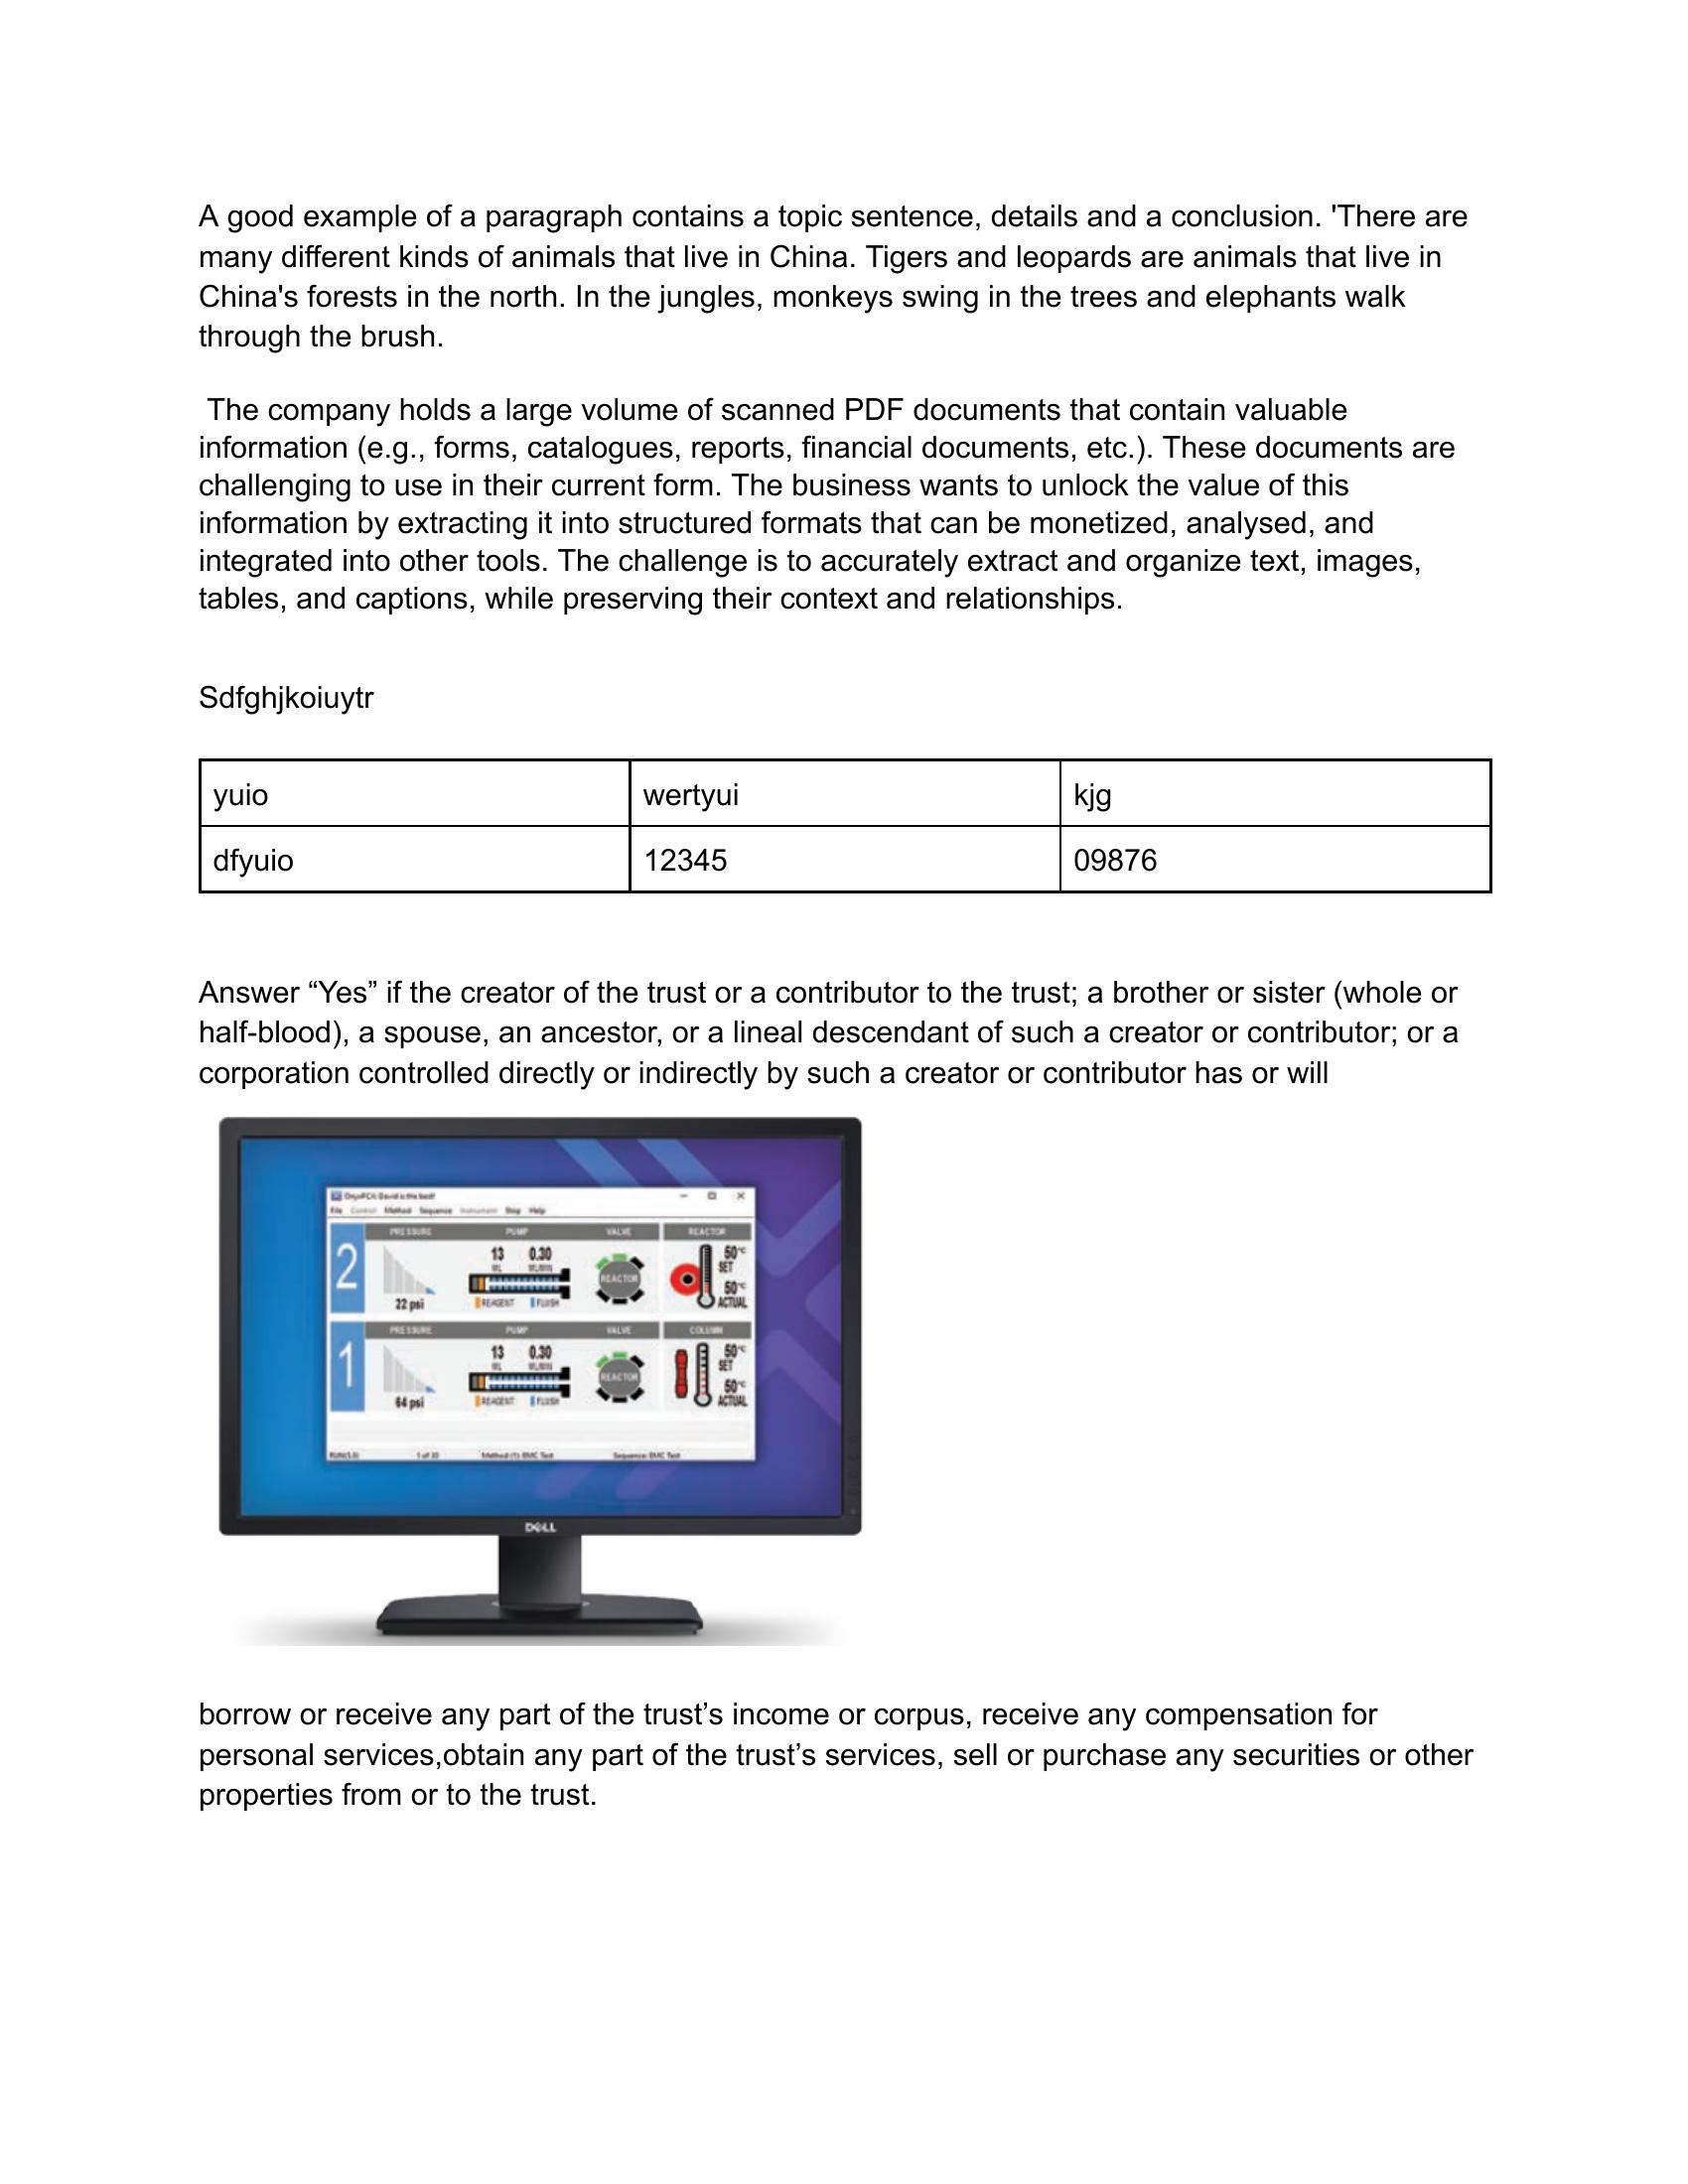

In [3]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !pip install opencv-python-headless
# !pip install pytesseract
# !pip install pdf2image
# !apt-get install -y poppler-utils
# !pip install yolov5
import torch
import os
import shutil
import cv2
from pdf2image import convert_from_path
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import pytesseract

pdf_path = '/content/TTA1.pdf'
output_images_path = '/content/extracted_images/'
os.makedirs(output_images_path, exist_ok=True)
images = convert_from_path(pdf_path)
for i, image in enumerate(images):
    image_path = os.path.join(output_images_path, f'page_{i+1}.jpg')
    image.save(image_path, 'JPEG')
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/custom_yolo_model/weights/best.pt')
categories = ['Table', 'Chart', 'Text', 'Form', 'Image']
base_output_path = '/content/extracted_elements/'
for category in categories:
    os.makedirs(os.path.join(base_output_path, category), exist_ok=True)
for img_path in os.listdir(output_images_path):
    image = cv2.imread(os.path.join(output_images_path, img_path))
    results = model(image)
    results.save()
    for detection in results.pred[0]:
        label = int(detection[-1])
        category_name = categories[label]
        x1, y1, x2, y2 = map(int, detection[:4])
        cropped_object = image[y1:y2, x1:x2]
        output_file_path = os.path.join(base_output_path, category_name, f'{category_name}_{img_path}')
        cv2.imwrite(output_file_path, cropped_object)

text_output_path = os.path.join(base_output_path, 'Text')
for text_img in os.listdir(text_output_path):
    img = cv2.imread(os.path.join(text_output_path, text_img))
    extracted_text = pytesseract.image_to_string(img)

    txt_filename = text_img.replace('.jpg', '.txt')
    with open(os.path.join(text_output_path, txt_filename), 'w') as f:
        f.write(extracted_text)
sample_image_path = os.path.join(output_images_path, 'page_1.jpg')
image_sample = cv2.imread(sample_image_path)
cv2_imshow(image_sample)
